**Arabic Event Manager Chatbot**

The purpose of this activity is the development of an Arabic Text Assistant (Chatbot).

This assistant has the ability to act as an event manager, when it is provided with a given text, it can automatically suggest the creation of an event with the necessary details: Event Title, Date, Time and Location.

The assistant can also provide the user with the ability to give their feedback (like or don't like the answer) and eventually provide the overall sentiment of the user throughout the conversation.

**Step0 - Create a folder named bert-base-arabic-ner in the root directory**

In [ ]:
#create a folder named bert-base-arabic-ner in the root directory
!mkdir -p /content/bert-base-arabic-ner

This command creates a folder named bert-base-arabic-ner in the root directory to store the model files

**Step 1 - Setup and Installations**

In this step, we will set up the environment by installing the necessary libraries and loading the Arabic BERT model

In [ ]:
#Install the required libraries
!pip install transformers --quiet
!pip install gradio --quiet
!pip install scikit-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

These commands install essential libraries: transformers for the BERT model, gradio for building a user interface, and scikit-learn for evaluation metrics

**Step 2 - Load the Arabic BERT Model**

Here, we will load the BERT model for Named Entity Recognition (NER) to perform extraction.

In [ ]:
from transformers import pipeline

#Load the Arabic BERT model for NER
ner_model = pipeline("ner", model="asafaya/bert-base-arabic", grouped_entities=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


Here, we are initializing a Named Entity Recognition (NER) model using the asafaya/bert-base-arabic BERT model from the Hugging Face library.

**Step 3 - Define Event Extraction Function**

In this step, we'll create a function called extract_event_details that combines rule-based extraction and the NER model to identify the event details.

This function uses a combination of rule-based methods and the NER model to extract the title, date, time, and location from Arabic sentences

In [ ]:
import re

def extract_event_details(text):
    """
    Extract event details using both rule-based patterns and the NER model.
    """
    # Step A- Use Rule-Based Extraction
    date_pattern = r"(يوم\s(?:الاثنين|الثلاثاء|الأربعاء|الخميس|الجمعة|السبت|الأحد)|\d{1,2}\s(?:يناير|فبراير|مارس|أبريل|مايو|يونيو|يوليو|أغسطس|سبتمبر|أكتوبر|نوفمبر|ديسمبر))"
    date_match = re.search(date_pattern, text)
    event_date = date_match.group() if date_match else "غير محدد"

    #extract Time
    time_pattern = r"الساعة\s(\d{1,2}:\d{2})"
    time_match = re.search(time_pattern, text)
    event_time = time_match.group(1) if time_match else "غير محدد"

    #extract Location
    location_pattern = r"في\s(\w+\s?\w*)"
    location_match = re.search(location_pattern, text)
    event_location = location_match.group(1) if location_match else "غير محدد"

    #extract Event Title
    title_pattern = r"(?:اجتماع|ندوة|مؤتمر|حفلة|ورشة|جلسة|مناقشة|حفل)\s(?:عمل|تخرج|حول|مهم|علمي|تقني|ثقافي|اجتماعي|برمجة|التكنولوجيا|الرياضة|الأدب|الفنون|الثقافة|العلوم|الدراسات|التكنولوجيا|التقنية|الأعمال|الموسيقى|التربية|اللغة|الكتابة|التاريخ|الجغرافيا|الشعر|القصص|التسويق|المبيعات|الإدارة|الصحة|التعليم|الطب|الهندسة|الأمن|السياسات|الاقتصاد|الفلسفة|الأديان|اللغات|التجارة|السياسة)(?:\s[^\s]+){0,2}"
    title_match = re.search(title_pattern, text)

    if title_match:
        event_title = title_match.group()
        #remove words like "يوم [day]" from the event title if found #because it causes some issues at the beginning
        event_title = re.sub(r"\s?يوم\s?\S*", "", event_title).strip()
    else:
        event_title = "غير محدد"

    #Step B- Use NER Model for Enhanced Extraction
    ner_results = ner_model(text)
    for entity in ner_results:
        entity_text = entity['word']
        entity_label = entity['entity_group']
        if entity_label == "DATE" and event_date == "غير محدد":
            event_date = entity_text
        elif entity_label == "TIME" and event_time == "غير محدد":
            event_time = entity_text
        elif entity_label == "LOC" and event_location == "غير محدد":
            event_location = entity_text

    return f"عنوان الحدث: {event_title}", f"التاريخ: {event_date}", f"الوقت: {event_time}", f"الموقع: {event_location}"


**Step 4 - Create the Gradio Interface**

This part creates a user interface using Gradio to allow users to input Arabic sentences and view extracted details like title, date, time, and location interactively.

1- Split the text into sentences

We will use Python's split('.') method to split the input by periods

2- Loop through each sentence and extract the event details

In [ ]:
def extract_details_interface(input_text):
    """
    Gradio wrapper to extract event details from multiple input sentences.
    """
    #split the input text into sentences (splitting by period for simplicity)
    sentences = [sentence.strip() for sentence in input_text.split('.') if sentence.strip()]

    #store results for each sentence
    results = []

    for sentence in sentences:
        title, date, time, location = extract_event_details(sentence)
        results.append(f"Sentence: {sentence}")
        results.append(f"Title: {title}")
        results.append(f"Date: {date}")
        results.append(f"Time: {time}")
        results.append(f"Location: {location}")
        results.append("-----")  #separator between sentence results

    #return the results joined by newlines
    return '\n'.join(results)


Gradio Interface to Display Multiple Sentences Output

In [ ]:
import gradio as gr
gradio_interface = gr.Interface(
    fn=extract_details_interface,
    inputs=gr.Textbox(label="أدخل الجمل هنا", placeholder="اكتب جمل باللغة العربية..."),
    outputs=gr.Textbox(label="التفاصيل المُستخلصة لكل جملة"),  #single output for multiple sentences
    title="Arabic Event Extraction Assistant",
    description="أدخل نصاً يحتوي على جمل متعددة باللغة العربية لاستخراج تفاصيل الحدث (العنوان، التاريخ، الوقت، والموقع) لكل جملة."
)

In [ ]:
#Launch the Gradio app
gradio_interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://506bb23c44a67e82fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Step 5 - Save the feedback form customers (Captures user opinions and stores them separately in feedback.csv.)**

In [ ]:
#Results are saved in a CSV file in append mode to keep previous responses
import pandas as pd
import os
import ipywidgets as widgets
from IPython.display import display, clear_output

#function to save the feedback
def feedback_save(b):
    df = pd.DataFrame({"Name": [N.value], "Feedback": [F.value], "Sentiment": [S.value]})
    #create file in append mode to keep updating
    df.to_csv("feedback.csv", mode='a', header=not os.path.isfile("feedback.csv"), index=False)
    N.value, F.value, S.value = '', '', None
    with output:
        clear_output()
        print("* Thank you for your feedback! *")  #display thank you message
        print("  See you soon!   ")

#define the widget components
N= widgets.Text(placeholder='Enter your name', description="Name:")
F = widgets.Textarea(placeholder='Please Enter your feedback', description="Your Feedback:", layout=widgets.Layout(width='500px', height='200px'))
S= widgets.Dropdown(options=['Positive', 'Negative', 'Neutral'], description='Sentiment:')
button = widgets.Button(description="Done", button_style='success')
button.on_click(feedback_save)
output = widgets.Output()

#display the feedback form
display(N, F, S, button, output)


Text(value='', description='Name:', placeholder='Enter your name')

Textarea(value='', description='Your Feedback:', layout=Layout(height='200px', width='500px'), placeholder='Pl…

Dropdown(description='Sentiment:', options=('Positive', 'Negative', 'Neutral'), value='Positive')

Button(button_style='success', description='Done', style=ButtonStyle())

Output()

**Step 6 - Define Ground Truth for Evaluation**

Create a ground truth dictionary based on the provided sentences for evaluation.

In [ ]:
#ground_truth dictionary for two sentences per example
import pandas as pd
import os
ground_truth = {
    "Title": [
        "اجتماع مهم", "اجتماع متابعة", "مؤتمر علمي", "تقديم تقارير", "ندوة حول التكنولوجيا", "مؤتمر حول الابتكار",
        "حفلة تخرج", "حفلة توزيع شهادات", "ورشة عمل حول البرمجة", "ورشة البرمجة المتقدمة",
        "حفل موسيقي", "حفل تكريمي", "اجتماع لمجلس الإدارة", "اجتماع المناقشة النهائية",
        "مؤتمر طبي حول الأمراض المزمنة", "مؤتمر حول السرطان", "ورشة عمل لتعلم البرمجة", "جلسة تدريبية",
        "ندوة عن الذكاء الاصطناعي", "ورشة التطبيقات الحديثة", "حفل توزيع جوائز", "مؤتمر صحفي",
        "جلسة تصوير", "جلسة مراجعة الصور", "اجتماع طارئ", "اجتماع متابعة القرارات",
        "حفلة عيد ميلاد", "حفلة أخرى", "معرض للكتب", "ورشة الكتابة الإبداعية"
    ],
    "Date": [
        "الجمعة", "الاثنين", "10 أكتوبر", "11 أكتوبر", "الثلاثاء", "الأربعاء",
        "السبت المقبل", "الأحد", "5 نوفمبر", "6 نوفمبر", "الخميس", "الجمعة",
        "الاثنين", "الثلاثاء", "15 ديسمبر", "16 ديسمبر", "السبت", "الأحد",
        "الثلاثاء المقبل", "الخميس", "الأحد", "الاثنين", "الأربعاء", "الخميس",
        "الخميس", "الجمعة", "الجمعة المقبل", "السبت", "25 نوفمبر", "26 نوفمبر"
    ],
    "Time": [
        "غير محدد", "غير محدد", "10:30", "غير محدد", "14:00", "15:00",
        "18:00", "غير محدد", "غير محدد", "غير محدد", "غير محدد", "الساعة السابعة",
        "غير محدد", "غير محدد", "غير محدد", "غير محدد", "9:00 صباحاً", "10:00 صباحاً",
        "غير محدد", "غير محدد", "غير محدد", "غير محدد", "11:00 صباحاً", "12:00 ظهرًا",
        "16:00", "14:00", "غير محدد", "غير محدد", "غير محدد", "غير محدد"
    ],
    "Location": [
        "مكتب الشركة", "قاعة الاجتماعات", "قاعة الاجتماعات", "المكتب المركزي",
        "قاعة الابتكار", "قاعة الابتكار", "الجامعة", "قاعة الجامعة",
        "مختبر الحاسوب", "القاعة التكنولوجية", "دار الأوبرا", "قاعة الفنون",
        "قاعة الاجتماعات الرئيسية", "غرفة الاجتماعات", "المستشفى الجامعي",
        "نفس القاعة", "المختبر", "نفس المختبر", "مركز البحوث", "مركز الابتكار",
        "فندق الريتز كارلتون", "القاعة الرئيسية", "الاستوديو", "قاعة الاجتماعات",
        "قاعة الاجتماعات", "القاعة ذاتها", "الحديقة العامة", "صالة الاحتفالات الخاصة",
        "المكتبة الوطنية", "القاعة الثقافية"
    ]
}

# Convert to DataFrame
df_truth = pd.DataFrame(ground_truth)

In [ ]:
df_truth.head()

,Title,Date,Time,Location
0,اجتماع مهم,الجمعة,غير محدد,مكتب الشركة
1,اجتماع متابعة,الاثنين,غير محدد,قاعة الاجتماعات
2,مؤتمر علمي,10 أكتوبر,10:30,قاعة الاجتماعات
3,تقديم تقارير,11 أكتوبر,غير محدد,المكتب المركزي
4,ندوة حول التكنولوجيا,الثلاثاء,14:00,قاعة الابتكار


**Step 6.1 - Collect Predicted Event Details for Each Sentence**

Here, we apply our extract_event_details function to each example sentence and store the model's predicted output.

In [ ]:
#First, we need to extract the details for all example sentences and store them
import pandas as pd
import os

#Refined example sentences with two sentences per example, with time, date, and location included
example_sentences = [
    "اجتماع مهم سيُعقد يوم الجمعة في مكتب الشركة. سيعقد اجتماع متابعة يوم الاثنين في قاعة الاجتماعات.",
    "سيُعقد مؤتمر علمي يوم 10 أكتوبر الساعة 10:30 في قاعة الاجتماعات. يجب على الحضور تقديم تقاريرهم يوم 11 أكتوبر في المكتب المركزي.",
    "ندوة حول التكنولوجيا ستُقام يوم الثلاثاء الساعة 14:00. مؤتمر آخر حول الابتكار سيكون يوم الأربعاء الساعة 15:00 في قاعة الابتكار.",
    "حفلة تخرج يوم السبت المقبل الساعة 18:00 في الجامعة. حفلة توزيع شهادات ستتم يوم الأحد في قاعة الجامعة.",
    "سنقيم ورشة عمل حول البرمجة يوم 5 نوفمبر في مختبر الحاسوب. ورشة أخرى حول البرمجة المتقدمة يوم 6 نوفمبر في القاعة التكنولوجية.",
    "حفل موسيقي سيُقام يوم الخميس في دار الأوبرا. حفل تكريمي للفرقة الموسيقية سيُقام يوم الجمعة في قاعة الفنون.",
    "اجتماع لمجلس الإدارة يوم الاثنين في قاعة الاجتماعات الرئيسية. اجتماع آخر للمناقشة النهائية يوم الثلاثاء في غرفة الاجتماعات.",
    "مؤتمر طبي حول الأمراض المزمنة سيُعقد يوم 15 ديسمبر في المستشفى الجامعي. مؤتمر آخر حول السرطان سيُعقد يوم 16 ديسمبر في نفس القاعة.",
    "ورشة عمل لتعلم البرمجة ستُقام يوم السبت الساعة 9:00 صباحاً في المختبر. جلسة تدريبية أخرى ستُقام يوم الأحد الساعة 10:00 في المختبر نفسه.",
    "ندوة عن الذكاء الاصطناعي ستُعقد يوم الثلاثاء المقبل في مركز البحوث. ورشة عمل حول التطبيقات الحديثة ستُقام يوم الخميس في مركز الابتكار.",
    "حفل توزيع جوائز سيُعقد يوم الأحد في فندق الريتز كارلتون. مؤتمر صحفي بعد الحفل سيُعقد يوم الاثنين في القاعة الرئيسية.",
    "جلسة تصوير ستُعقد يوم الأربعاء الساعة 11:00 صباحاً في الاستوديو. جلسة مراجعة الصور ستُعقد يوم الخميس الساعة 12:00 في قاعة الاجتماعات.",
    "اجتماع طارئ لمناقشة الوضع الراهن سيُعقد يوم الخميس الساعة 16:00 في قاعة الاجتماعات. اجتماع آخر لمتابعة القرارات سيُعقد يوم الجمعة الساعة 14:00 في القاعة ذاتها.",
    "حفلة عيد ميلاد ستُقام يوم الجمعة المقبل في الحديقة العامة. حفلة أخرى ستُقام يوم السبت في صالة الاحتفالات الخاصة.",
    "معرض للكتب سيُعقد يوم 25 نوفمبر في المكتبة الوطنية. ورشة حول الكتابة الإبداعية ستُقام يوم 26 نوفمبر في القاعة الثقافية."
]

#Initialize empty dictionaries for storing predictions
predictions = {
    "Title": [],
    "Date": [],
    "Time": [],
    "Location": []
}

#Extract predictions for both sentences in each example and store them
for sentence in example_sentences:
    #Split the example into two sentences
    two_sentences = sentence.split(". ")

    #Extract predictions for each sentence
    for single_sentence in two_sentences:
        title, date, time, location = extract_event_details(single_sentence)
        predictions["Title"].append(title.split(": ")[1])  #Extract the text after "عنوان الحدث: "
        predictions["Date"].append(date.split(": ")[1].replace(f'يوم',''))  #Extract the text after "التاريخ: "
        predictions["Time"].append(time.split(": ")[1])    #Extract the text after "الوقت: "
        predictions["Location"].append(location.split(": ")[1])  #Extract the text after "الموقع: "

#Save the predictions in dataframe
df_pred = pd.DataFrame(predictions)

#Concatenate the ground truth and predictions
both_df = pd.concat([df_truth.reset_index(drop=True), df_pred.reset_index(drop=True)], axis=1)

#Rename the columns if needed
both_df.columns = ['Truth_Title', 'Truth_Date', 'Truth_Time', 'Truth_Location', 'Pred_Title', 'Pred_Date', 'Pred_Time', 'Pred_Location']

print("Predictions collected successfully with matching lengths!")


Predictions collected successfully with matching lengths!


In [ ]:
both_df

,Truth_Title,Truth_Date,Truth_Time,Truth_Location,Pred_Title,Pred_Date,Pred_Time,Pred_Location
0,اجتماع مهم,الجمعة,غير محدد,مكتب الشركة,اجتماع مهم سيُعقد,الجمعة,غير محدد,مكتب الشركة
1,اجتماع متابعة,الاثنين,غير محدد,قاعة الاجتماعات,غير محدد,الاثنين,غير محدد,قاعة الاجتماعات
2,مؤتمر علمي,10 أكتوبر,10:30,قاعة الاجتماعات,مؤتمر علمي,10 أكتوبر,10:30,قاعة الاجتماعات
3,تقديم تقارير,11 أكتوبر,غير محدد,المكتب المركزي,غير محدد,11 أكتوبر,غير محدد,المكتب المركزي
4,ندوة حول التكنولوجيا,الثلاثاء,14:00,قاعة الابتكار,ندوة حول التكنولوجيا ستُقام,الثلاثاء,14:00,غير محدد
5,مؤتمر حول الابتكار,الأربعاء,15:00,قاعة الابتكار,غير محدد,الأربعاء,15:00,قاعة الابتكار
6,حفلة تخرج,السبت المقبل,18:00,الجامعة,حفلة تخرج,السبت,18:00,الجامعة
7,حفلة توزيع شهادات,الأحد,غير محدد,قاعة الجامعة,غير محدد,الأحد,غير محدد,قاعة الجامعة
8,ورشة عمل حول البرمجة,5 نوفمبر,غير محدد,مختبر الحاسوب,ورشة عمل حول البرمجة,5 نوفمبر,غير محدد,مختبر الحاسوب
9,ورشة البرمجة المتقدمة,6 نوفمبر,غير محدد,القاعة التكنولوجية,غير محدد,6 نوفمبر,غير محدد,القاعة التكنولوجية


**Step 6.2 - Creating Confusion Matrices and Charts for All Attributes**

This step generates the classification report for Title, Date, Time, and Location using sklearn.metrics.classification_report

Also, for each attribute, this code creates a confusion matrix to show how well the model's predictions match the actual ground truth.

And, it calculates the Accuracy, Recall, and F1-Score for each attribute and stores them in a dictionary for visualization.

Finally, bar charts are generated to compare Accuracy, Recall, and F1-Score across the four attributes (Title, Date, Time, and Location).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

#Evaluation Function for All Attributes
def evaluate_model_extended(predictions, ground_truth):
    """
    Evaluate the performance of the model using classification metrics and visualize results for all attributes.
    """

    #Step A - Print Classification Reports for Each Attribute
    print("\nClassification Report for Titles:")
    print(classification_report(ground_truth['Title'], predictions['Title'], zero_division=1))

    print("\nClassification Report for Dates:")
    print(classification_report(ground_truth['Date'], predictions['Date'], zero_division=1))

    print("\nClassification Report for Times:")
    print(classification_report(ground_truth['Time'], predictions['Time'], zero_division=1))

    print("\nClassification Report for Locations:")
    print(classification_report(ground_truth['Location'], predictions['Location'], zero_division=1))

    #Step B - Create Confusion Matrices for Each Attribute
    for category in ['Title', 'Date', 'Time', 'Location']:
        unique_labels = sorted(list(set(ground_truth[category] + predictions[category])))
        cm = confusion_matrix(ground_truth[category], predictions[category], labels=unique_labels)

        #Step C - Plot Confusion Matrix for the Attribute
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
        plt.title(f"Confusion Matrix for {category} Predictions")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    #Step D - Calculate Overall Accuracy, Recall, and F1-Score for Each Attribute
    metrics = {'Attribute': [], 'Accuracy': [], 'Recall': [], 'F1-Score': []}
    for category in ['Title', 'Date', 'Time', 'Location']:
        metrics['Attribute'].append(category)
        metrics['Accuracy'].append(accuracy_score(ground_truth[category], predictions[category]))
        metrics['Recall'].append(recall_score(ground_truth[category], predictions[category], average='macro', zero_division=1))
        metrics['F1-Score'].append(f1_score(ground_truth[category], predictions[category], average='macro', zero_division=1))

    #Step E - Plot Bar Chart for Each Metric Comparison
    for metric in ['Accuracy', 'Recall', 'F1-Score']:
        plt.figure(figsize=(10, 5))
        plt.bar(metrics['Attribute'], metrics[metric], color=['#4CAF50', '#2196F3', '#FF5722', '#FFC107'])
        plt.title(f"{metric} Comparison Across Different Attributes")
        plt.xlabel("Attributes")
        plt.ylabel(metric)
        for i, v in enumerate(metrics[metric]):
            plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
        plt.ylim(0, 1)
        plt.show()



Classification Report for Titles:
                               precision    recall  f1-score   support

     اجتماع المناقشة النهائية       1.00      0.00      0.00         1
                  اجتماع طارئ       1.00      0.00      0.00         1
         اجتماع لمجلس الإدارة       1.00      0.00      0.00         1
                اجتماع متابعة       1.00      0.00      0.00         1
       اجتماع متابعة القرارات       1.00      0.00      0.00         1
                   اجتماع مهم       1.00      0.00      0.00         1
            اجتماع مهم سيُعقد       0.00      1.00      0.00         0
                 تقديم تقارير       1.00      0.00      0.00         1
                 جلسة تدريبية       1.00      0.00      0.00         1
                   جلسة تصوير       1.00      0.00      0.00         1
            جلسة مراجعة الصور       1.00      0.00      0.00         1
                   حفل تكريمي       1.00      0.00      0.00         1
              حفل توزيع جوائز       1.00 

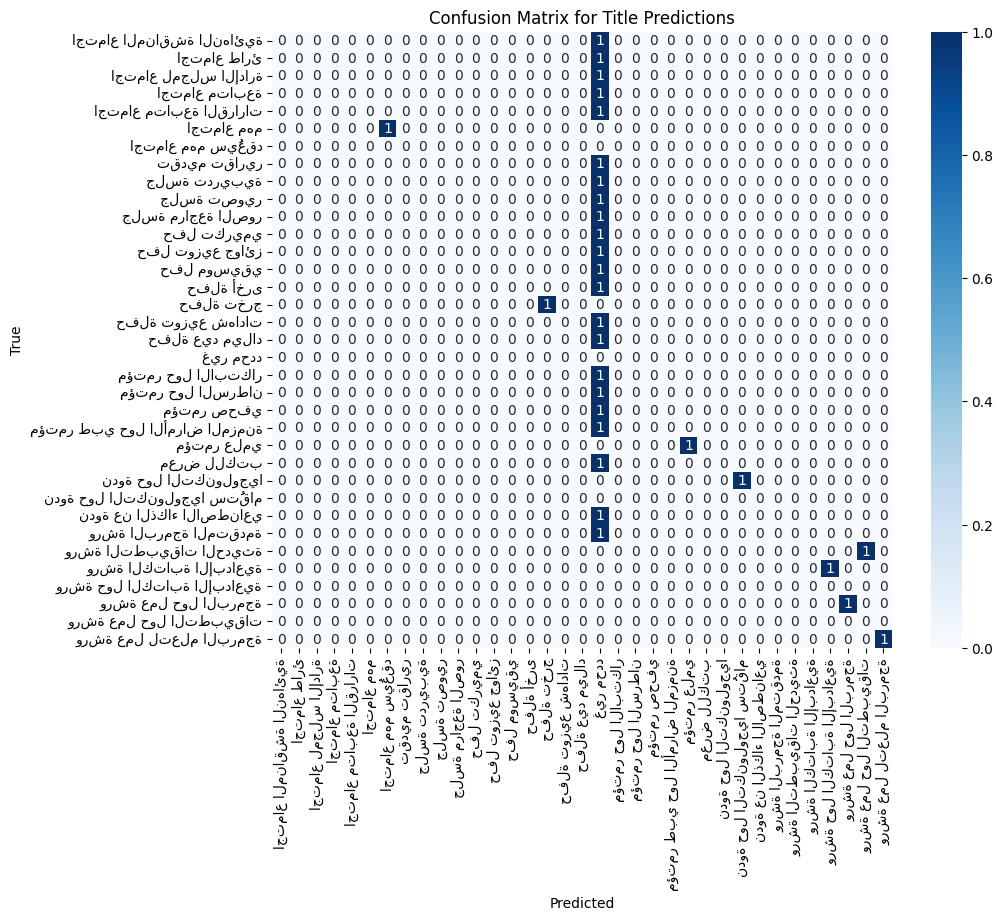

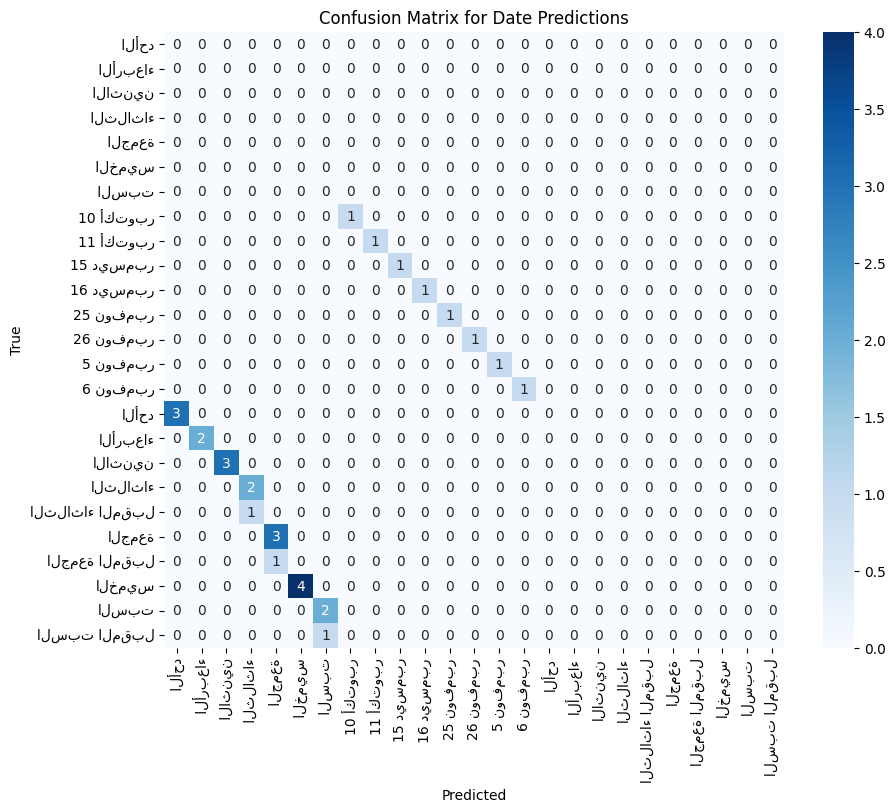

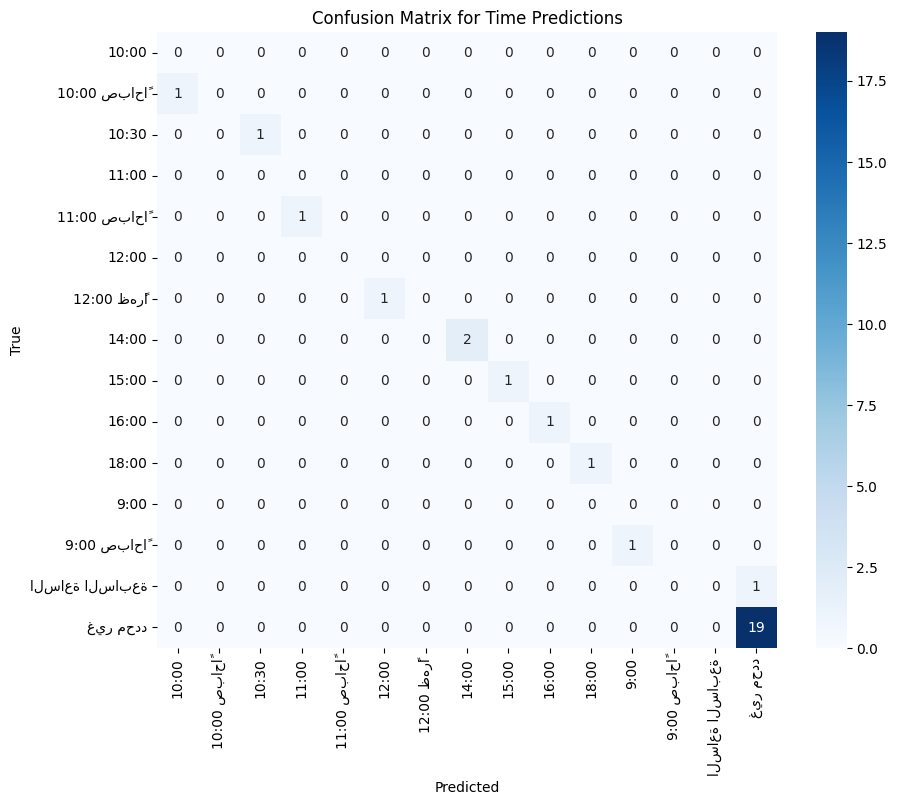

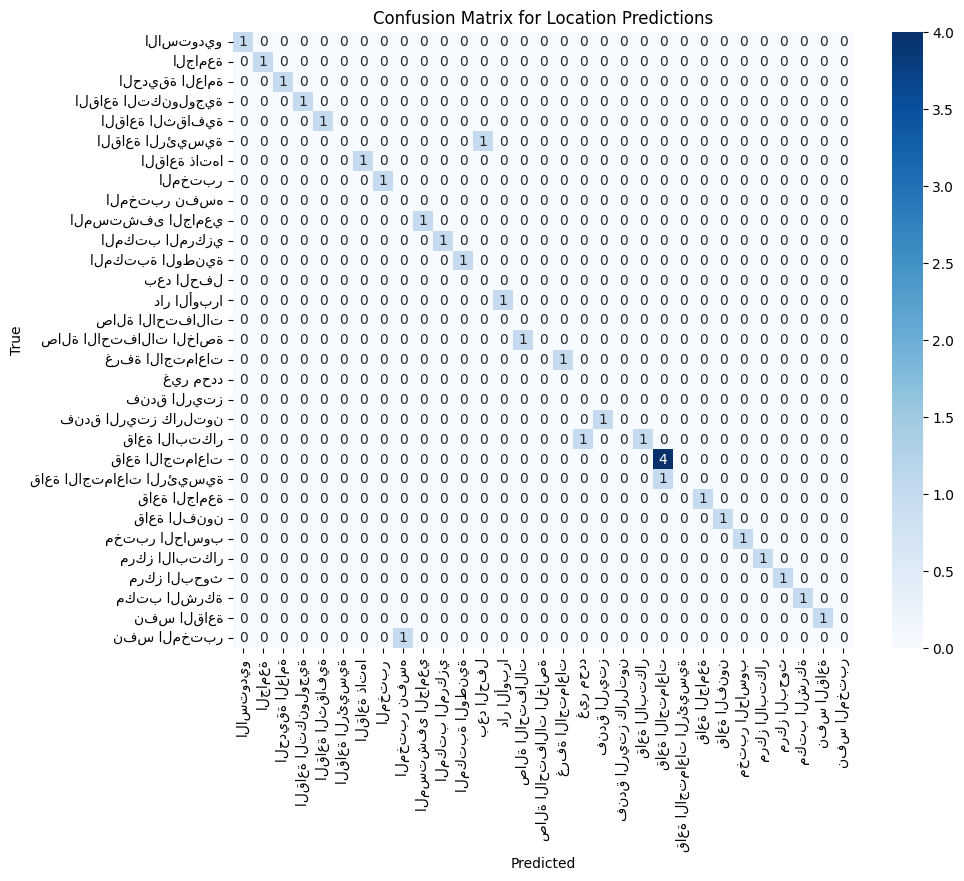

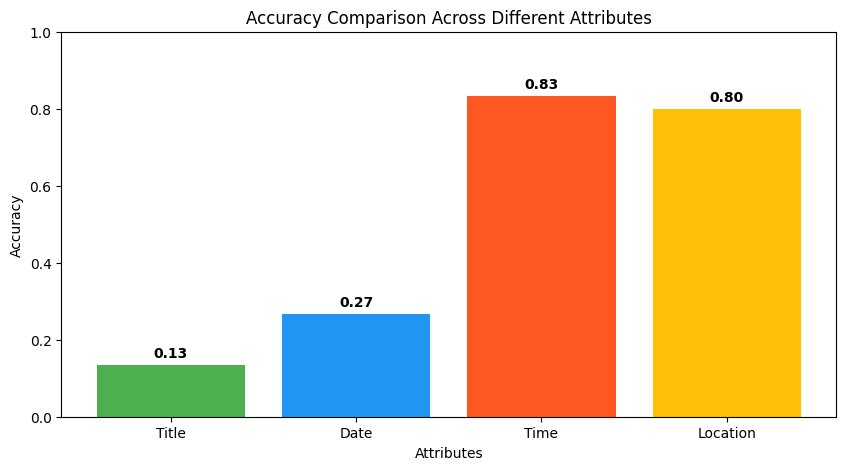

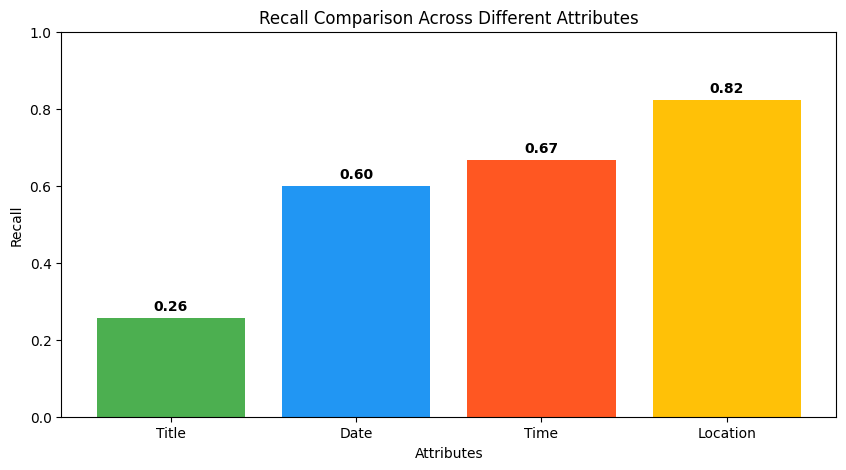

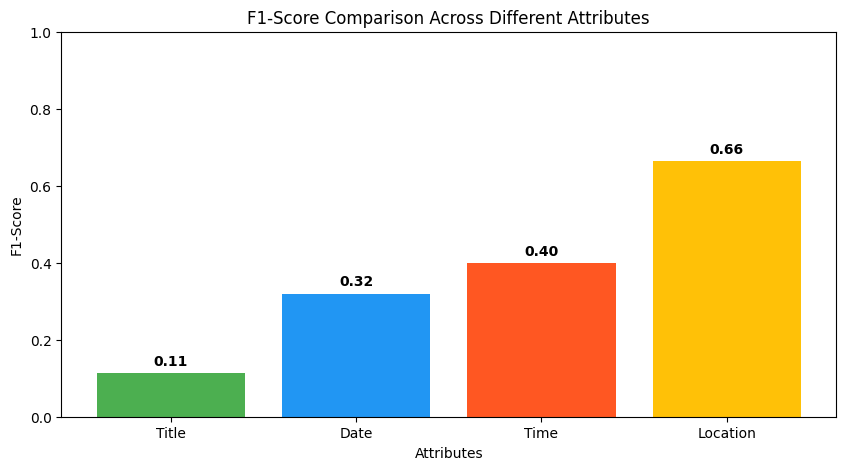

In [ ]:
evaluate_model_extended(predictions, ground_truth)

**Summary of Results:**

The chatbot's ability to retrieve event-related information differed depending on the category. Only 13% of titles were successfully identified by the model, with titles such "حفلة تخرج" and "ورشة عمل لتعلم البرمجة" being correctly identified, but many others were not. Recall was very low, indicating that the model frequently overlooked real titles, even while precision for correctly detected titles was good.

The model's accuracy for date extraction was 27%; it performed better on exact dates, such as "10 أكتوبر," but it had trouble with relative phrases, such as "الثلاثاء." The time extraction test also worked significantly better, with 83% accuracy and correctly identifying times like "10:30" and "14:00," while it occasionally overlooked confusing times like "9:00 صباحاً."

The model successfully recognized sites like "الجامعة" and "فندق الريتز كارلتون" with 80% accuracy in the location extraction task, but it had trouble with repetitive locations like "نفس القاعة." The model showed excellent precision but low recall across all categories, meaning that although it made mainly accurate predictions, it missed a sizable portion of real entities.


**Conclusion**:

The findings show that although the chatbot does an excellent job of extracting precise information, such as times and locations, it has trouble with titles and dates, which results in poor recall across a number of categories. The model is conservative, frequently producing accurate forecasts but missing a significant amount of pertinent information, as evidenced by its high precision but low recall. This suggests that addressing intricate Arabic grammar and ambiguity in event-related language may provide challenges.

